<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/2_0_KNeighborsClassifier_BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***KNeighborsClassifier : 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살핌. 가장 가까운 이웃을 참고하여 정답을 예측하는 알고리즘***


implements learning based on the nearest neighbors of each query point, where is an integer value specified by the user.

FEATURES

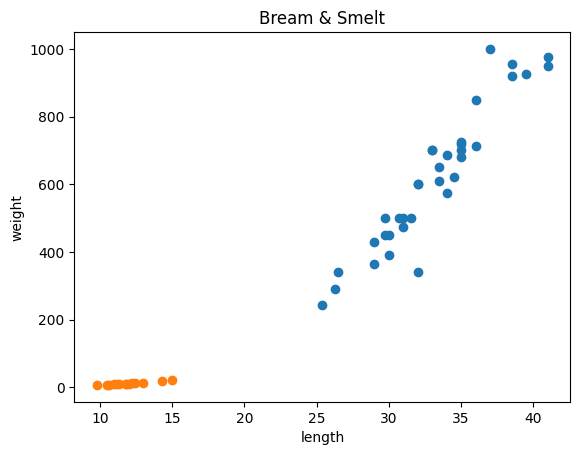

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Bream & Smelt')
plt.show()

Information List


In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l,w] for l, w in zip(length, weight)] #zip은 리스트에서 원소를 하나씩 꺼내줌
                                                    #length >> l, weight >> w로 할당, for loop
print(fish_data)


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


Answer List

In [ ]:
#first 39 fish : bream >> 1
#last 14 fish : smelt >> 0
fish_target = [1] * 35 + [0] * 14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Import KNeighborsClassifier from sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # kn is our model
#training >> fit()
kn.fit(fish_data, fish_target)
#evaluation >> score() : return 0 to 1
#1 >> 100% accuracy : 0.5 >> 50% accuracy
kn.score(fish_data, fish_target)
#predict using our model : predict([[x, y]]) x : length y : weight
kn.predict([[30, 600]])



array([1])

In [ ]:
#contain fish_data at _fit_X
#print(kn._fit_X)
#contain fish_target at _y
#print(kn._y)
#default number of data that refer to nearest >> 5
#set number
kn49 = KNeighborsClassifier(n_neighbors = 49) #kn model that wiht refering 49 data
#>> 모든 물고기 수 : 49. >> 다수의 물고기가 도미이므로, 어떤 데이터를 넣든 도미로 예측함.
kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target)) # score : 71%
print(35/49)

0.7142857142857143
0.7142857142857143


In [ ]:
for n in range(5, 50) :
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1.0 :
    print(n, score)
    break


18 0.9795918367346939


***정확한 테스트를 위해서는 test set, train set 나눠서 사용. train set으로 test
하면 100% 제대로 train 됐는지 알 수 없음.***

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1] * 35 + [0] * 14

#Let's use first 35 data for train, last 14 for test
#Sampling bias

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)


0.0

In [ ]:
import numpy as np
#list to array 1d to 2d or 3d

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


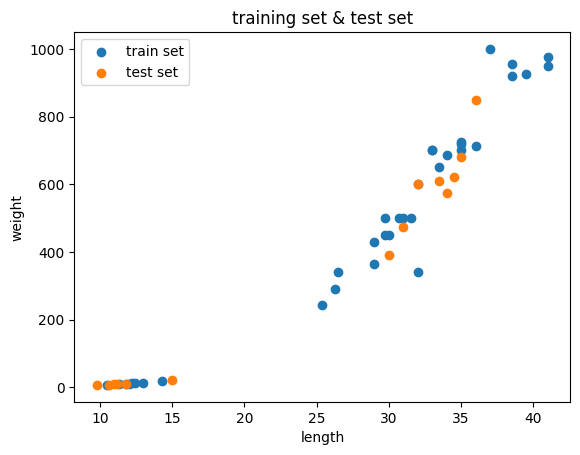

In [ ]:
np.random.seed(42)
index = np.arange(49) #generate 0 to 48
np.random.shuffle(index) #shuffle
print(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

#scatter plot
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['train set','test set'])
plt.title('training set & test set')
plt.show()


In [ ]:
#training
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
#predict
print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


***Data Preprocessing***

***Stratify : 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 나눔. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용.***

fish_data >> (train_input, test_input) \
fish_target >> (train_target, test_target)

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)


[0.]


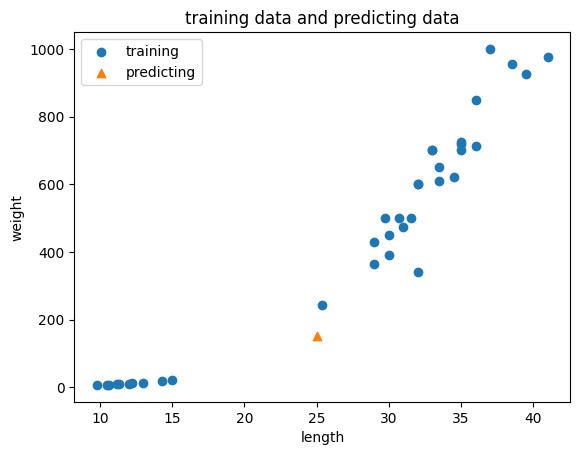

In [ ]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length,fish_weight)) #column_stack >> transpose to column stack
#column_stack only take 1 positional argument >> (fish_length) or ((fish_length,fish_weight))

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
#concatenate : 사슬같이 잇다

from sklearn.model_selection import train_test_split
#split sample to train and test group, randomly supple the sample before it.

#train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
#order of variable is important fish_data >> train_input, test_input | fish_target >> train_target, test_target

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(train_input, train_target)

print(kn.predict([[25, 150]]))

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('training data and predicting data')
plt.legend(['training','predicting'])
plt.show()

***kneighbors() >> 이웃까지의 거리와 이웃 샘플의 인덱스 반환***

default n : 5 >> return 5 neighbors

distances, indexes = kn.kneighbors([[25, 150]])

*2d array >> [[ ]]

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


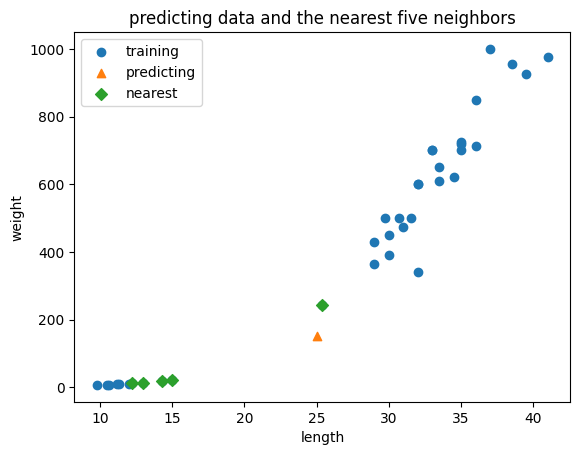

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [ ]:
distances, indexes = kn.kneighbors([[25,150]])
print(distances, indexes)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('predicting data and the nearest five neighbors')
plt.legend(['training','predicting','nearest'])
plt.show()

#https://bit.ly/matplotlib_marker. for every marker list in matplotlib

print(train_input[indexes])
print(train_target[indexes])
print(distances)


***the range of x (10 to 40) is narrower than the range of y (0 to 1000) >> bias in scale***

Needed Data Preprocessing >> standard score or z score

z score : indicates how many times the standard deviation is away from the mean

: (data - mean)/SD

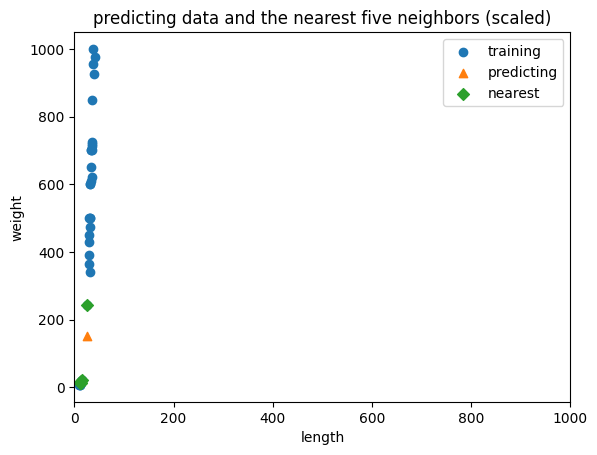

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.title('predicting data and the nearest five neighbors (scaled)')
plt.legend(['training','predicting','nearest'])
plt.show()

mean = np.mean(train_input, axis=0) #axis=0 >> y-axis
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std

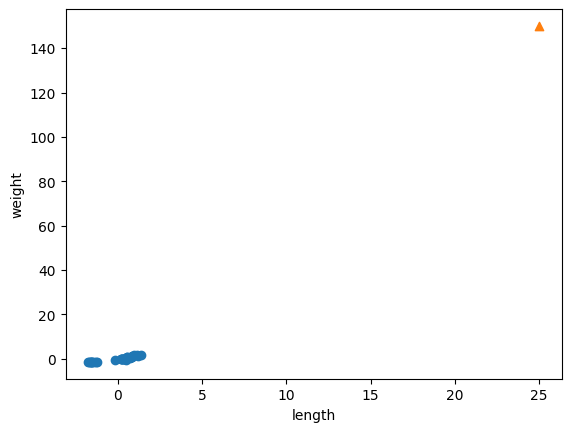

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

***The predicting data also must be scaled with the mean and std from the training set***

and the test set too! (with training set)

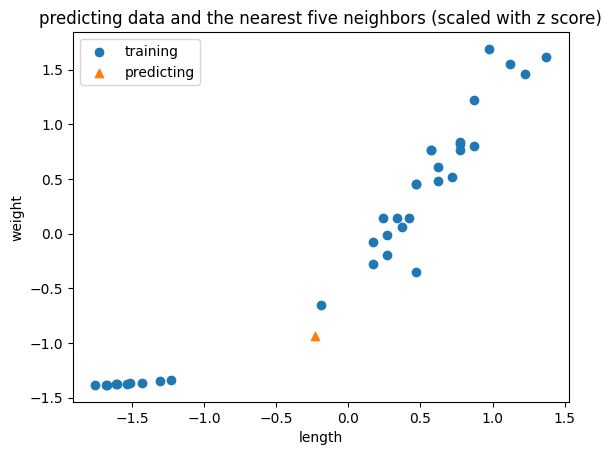

1.0
[1.]


In [ ]:
new = ([25, 150] - mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('predicting data and the nearest five neighbors (scaled with z score)')
plt.legend(['training','predicting'])
plt.show()

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean)/std
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

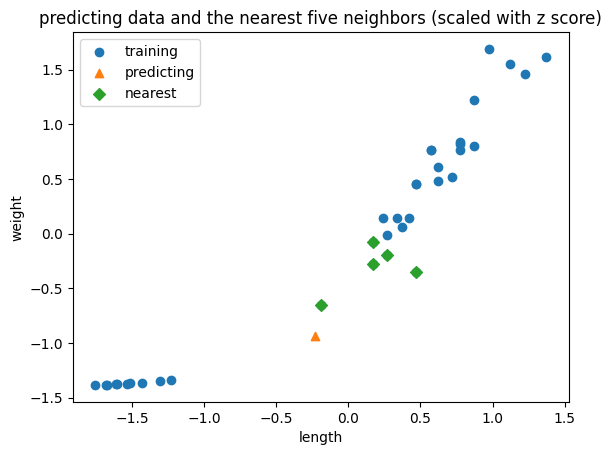

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('predicting data and the nearest five neighbors (scaled with z score)')
plt.legend(['training','predicting','nearest'])
plt.show()